In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [19]:
features_df = pd.read_csv('ctd_cadiovascular_20240223_scores.tsv', sep='\t')

ground_truth_df = pd.read_csv('merged_cardio.tsv', sep='\t')

print(features_df.head())
print(ground_truth_df.head())


     drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB  \
0  DB06709  DB08506  0.3427     0     0.615       0.630     0.46     0.74   
1  DB06709  DB02376  0.4188     0     0.685       0.685     0.56     0.81   
2  DB06709  DB04282  0.4188     0     0.685       0.685     0.56     0.81   
3  DB06709  DB04564  0.4188     0     0.685       0.685     0.56     0.81   
4  DB06709  DB04659  0.4188     0     0.685       0.685     0.56     0.81   

     zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  medianspAD  \
0  0.5097  1.3545  ...   2.0   0.0    0.5983    0.5773        0.59   
1  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
2  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
3  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
4  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   

   medianspBD  minspAD  minspBD  maxspAD  maxspBD  
0        0.56      0.0     0.28     1.47     1.30  
1        0.5

In [20]:

merged_df = pd.merge(features_df, ground_truth_df, on=['drugA', 'drugB'])

merged_df.set_index(['drugA', 'drugB'], inplace=True)
print(merged_df)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB00908  0.2497     0    0.5420       0.470     0.42     0.86 -1.0162   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -1.0162   
        DB01109  0.0183     0    0.2867       0.340     0.12     0.40 -1.0162   
        DB00606  0.3436     0    0.5617       0.540     0.40     0.78 -1.0162   
        DB00482  0.2900     0    0.4883       0.495     0.29     0.67 -1.0162   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08899 DB08932  0.1233     0    0.3000       0.300     0.28     0.32 -1.2095   
DB08905 DB08932  0.3833     0    0.5550       0.555     0.55     0.56  0.2120   
DB08918 DB08932  0.1547     0    0.5200       0.520     0.41     0.61 -2.0170   
DB08932 DB08953  0.3467     0    0.5200       0.520     0.51     0.53 -0.2648   
        DB08954  0.0550     

In [21]:
X = merged_df.drop(['adv/app','drugcomb','sA','sB','opA','opB'], axis=1)  # Annahme: 'adv/app' ist Ihre Zielvariable
Y = merged_df['adv/app']
print(X)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB00908  0.2497     0    0.5420       0.470     0.42     0.86 -1.0162   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -1.0162   
        DB01109  0.0183     0    0.2867       0.340     0.12     0.40 -1.0162   
        DB00606  0.3436     0    0.5617       0.540     0.40     0.78 -1.0162   
        DB00482  0.2900     0    0.4883       0.495     0.29     0.67 -1.0162   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08899 DB08932  0.1233     0    0.3000       0.300     0.28     0.32 -1.2095   
DB08905 DB08932  0.3833     0    0.5550       0.555     0.55     0.56  0.2120   
DB08918 DB08932  0.1547     0    0.5200       0.520     0.41     0.61 -2.0170   
DB08932 DB08953  0.3467     0    0.5200       0.520     0.51     0.53 -0.2648   
        DB08954  0.0550     

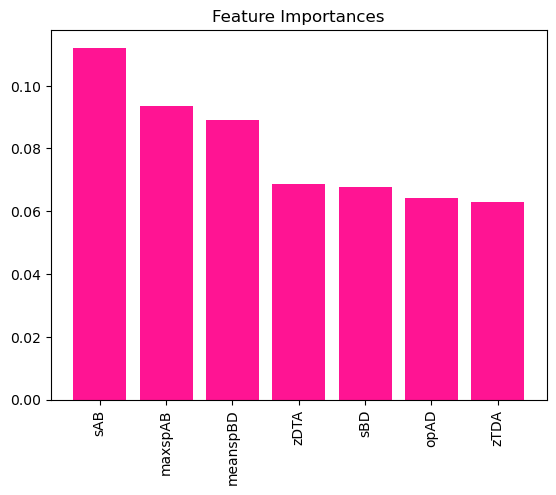

In [24]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Erstellen des Decision Tree Classifiers und Trainieren
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Feature-Wichtigkeiten ausgeben
importances = clf.feature_importances_

# Indizes der Features nach Wichtigkeit sortiert
indices = np.argsort(importances)[::-1]

# Kumulative Wichtigkeiten berechnen
cumulative_importances = np.cumsum(importances[indices])

# Finde die Anzahl der Features für 50% der gesamten Wichtigkeit
num_features_50 = np.where(cumulative_importances >= 0.5)[0][0] + 1

# Die wichtigsten Features plotten, die zusammen bis zu 50% der Wichtigkeit ausmachen
plt.figure()
plt.title("Feature Importances")
plt.bar(range(num_features_50), importances[indices][:num_features_50], color='deeppink')
plt.xticks(range(num_features_50), X.columns[indices][:num_features_50], rotation=90)
plt.show()